# 13 - Logistic Regression

**Logistic regression is a classification algorithm. It is used to predict a binary outcome based on a set of independent variables.**

**Logistic regression is one of the most popular Machine Learning algorithms, which comes under the Supervised Learning technique. It is used for predicting the categorical dependent variable using a given set of independent variables.**

**Logistic regression predicts the output of a categorical dependent variable. Therefore the outcome must be a categorical or discrete value. It can be either Yes or No, 0 or 1, true or False, etc. but instead of giving the exact value as 0 and 1, it gives the probabilistic values which lie between 0 and 1.**

**Logistic Regression is much similar to the Linear Regression except that how they are used. Linear Regression is used for solving Regression problems, whereas Logistic regression is used for solving the classification problems.**

**The sigmoid function is a mathematical function used to map the predicted values to probabilities.
It maps any real value into another value within a range of 0 and 1.**

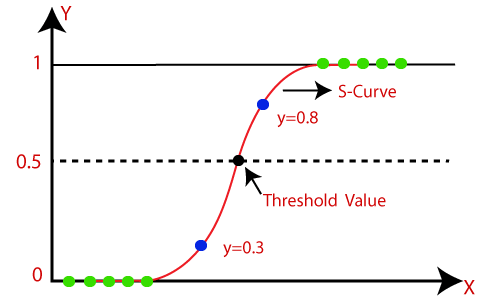

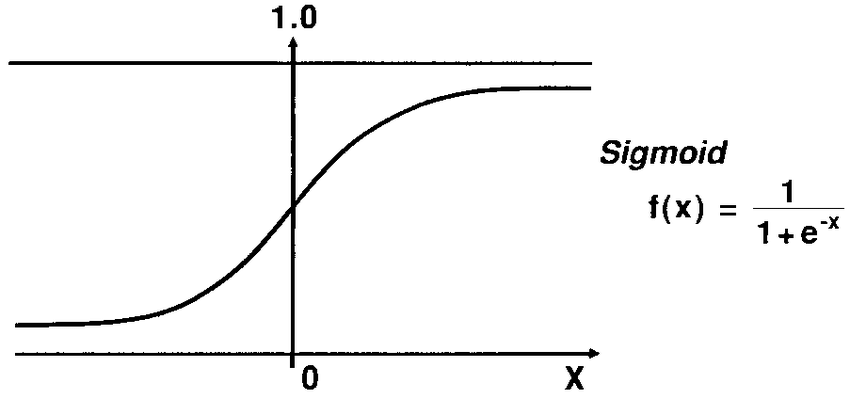

# Get Dataset

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("diabetes.csv")
data = df.copy()
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
data.isnull().values.any()

False

# Describe Dataset

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [14]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


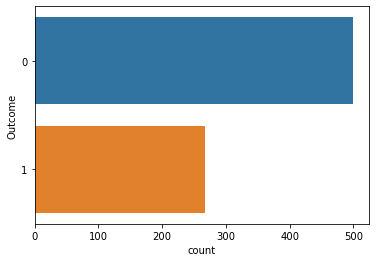

In [21]:
sns.countplot(y=data["Outcome"]);

In [22]:
X = data.drop(['Outcome'],axis=1)
y = data['Outcome']

print(X.shape)
print(y.shape)

(768, 8)
(768,)


# Import the model

In [23]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(solver='liblinear')
logistic_model.fit(X,y)

LogisticRegression(solver='liblinear')

In [25]:
logistic_model.coef_

array([[ 1.17062103e-01,  2.83893657e-02, -1.68885046e-02,
         7.55568280e-04, -6.42890136e-04,  5.97744495e-02,
         6.77484056e-01,  7.24131135e-03]])

In [28]:
logistic_model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [29]:
logistic_model.score(X,y)

0.7747395833333334

# Prediction with Confusion Matrix

In [43]:
# Use confusion matrix
from sklearn.metrics import confusion_matrix

# Find accuracy score
from sklearn.metrics import accuracy_score

y_pred = logistic_model.predict(X)
confusion_matrix(y,y_pred)

array([[448,  52],
       [121, 147]])

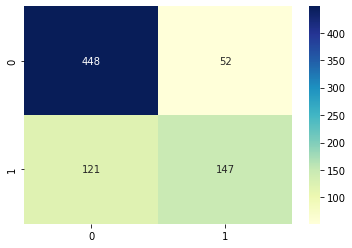

In [42]:
sns.heatmap(confusion_matrix(y,y_pred),annot=True,fmt='d',cmap="YlGnBu");

In [44]:
print(f"Accuracy Score = {accuracy_score(y,y_pred)}")

Accuracy Score = 0.7747395833333334


In [46]:
logistic_model.predict_proba(X)[:5]

array([[0.35038755, 0.64961245],
       [0.91703284, 0.08296716],
       [0.22474638, 0.77525362],
       [0.92139942, 0.07860058],
       [0.16726124, 0.83273876]])

In [47]:
y[:5]

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

# Model Tuning

In [51]:
from sklearn.model_selection import cross_val_score,train_test_split
import warnings
warnings.filterwarnings("ignore")

# Split train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=33)

log_model = LogisticRegression().fit(X_train,y_train)


In [54]:
cv_score = cross_val_score(log_model,X_test,y_test,cv=10).mean()
print(f"Cross-validated R2 Score = {cv_score}")

Cross-validated R2 Score = 0.7070833333333333


In [56]:
print(f"Accuracy Score = {accuracy_score(y_test,log_model.predict(X_test))}")

Accuracy Score = 0.7337662337662337
